In [24]:
#https://github.com/SamQLuong/Yale-Face-Correlation-with-SVD-and-Eigenvalues-Eigenvectors

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
results=loadmat('yalefaces.mat') # importing the yale face data set 
X=results['X'] # creating the 1024 by 2414 matrix of faces

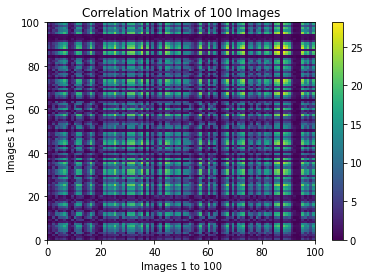

In [296]:
X100 = X[:100, :100] # grabbing the first 100 faces

C1 = np.dot(X100.T, X100) # creates the correlation matrix

# graphs the correlation matrix
plt.pcolor(C1)
plt.title('Correlation Matrix of 100 Images')
plt.xlabel('Images 1 to 100')
plt.ylabel('Images 1 to 100')
plt.colorbar()
plt.show()

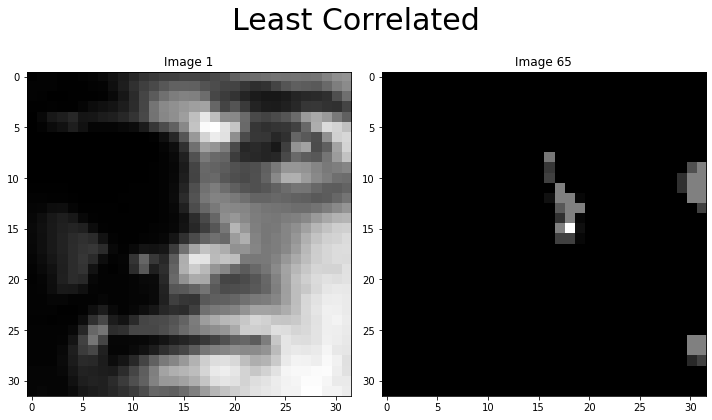

In [297]:
# Ignores the diagonals by making them equal to 1 and finding the minimum values of the correlation matrix
np.fill_diagonal(C1, 1)
face_min = np.unravel_index(np.argmin(C1), C1.shape)

# Plots the least correlated faces. The columns need to be reshape to be a 32 by 32 pixel image.
fig, axs = plt.subplots(1,2, figsize=(10,6))
fig.suptitle('Least Correlated', fontsize = 30)

axs[0].imshow(X[:,face_min[0]].reshape(32,32), cmap = 'gray')
axs[0].title.set_text(f"Image {face_min[0] + 1}")

axs[1].imshow(X[:,face_min[1]].reshape(32,32), cmap = 'gray')
axs[1].title.set_text(f"Image {face_min[1] + 1}")

plt.tight_layout()
plt.show()

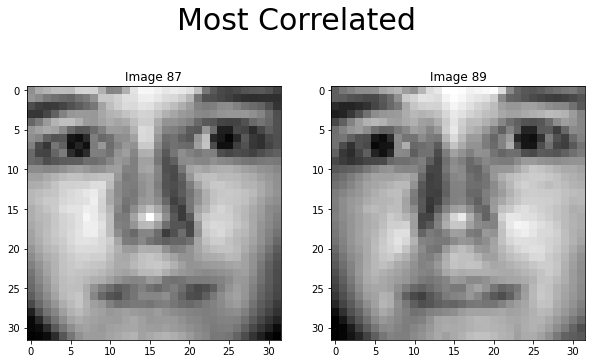

In [298]:
# Ignoring the diagonals by filling it with 0's, we locate the highest correlated faces
np.fill_diagonal(C1, 0)
face_max = np.unravel_index(np.argmax(C1), C1.shape)

# Plots the highest correlated images and reshaping the columns to a 32 by 32
fig, axs = plt.subplots(1,2, figsize=(10,6))
fig.suptitle('Most Correlated', fontsize = 30)

axs[0].imshow(X[:,face_max[0]].reshape(32,32), cmap = 'gray')
axs[0].title.set_text(f"Image {face_max[0] + 1}")

axs[1].imshow(X[:,face_max[1]].reshape(32,32), cmap = 'gray')
axs[1].title.set_text(f"Image {face_max[1] + 1}")

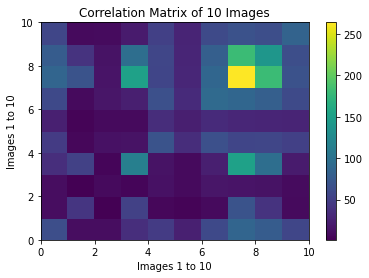

In [211]:
X10 = [] # creates empty array

# grabs the rows that are listed in the assignment and creates a 10 by 10 matrix
for row in X:
    columns = [row[0], row[312], row[511], row[4], 
              row[2399], row[112], row[1023], row[86], 
              row[313], row[2004]]
    X10.append(columns)

# converts X10 to be a 2D array and make it a 10 by 10 matrix
X10x10 = np.array(X10).reshape(len(X10), len(X10[0]))
C2 = np.dot(X10x10.T, X10x10) # find the correlation matrix by doing dot product

# plots the correlation matrix of the 10 faces
plt.pcolor(C2)
plt.title('Correlation Matrix of 10 Images')
plt.xlabel('Images 1 to 10')
plt.ylabel('Images 1 to 10')
plt.colorbar()
plt.show()

In [168]:
Y = np.dot(X, X.T) # creates the Y matrix using dot product for the eigenvalues and eigenvectors

eigenvalues, eigenvectors = np.linalg.eig(Y) # outputs eigenvectors and eigenvalues from Y

 # sorts the eigenvalues from least to greatest then reverse and grabs the 6 highest eigenvalues
large_index = np.argsort(eigenvalues)[::-1][:6]

# using the 6 highest eigenvalues, we can grab the 6 highest eigenvectors
large_eigvectors = eigenvectors[:, large_index]

print(large_eigvectors) # prints the eigenvectors

[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]


In [236]:
# using SVD method, we can grab the U, s, and V matrix by inputing X
U, s, V = np.linalg.svd(X)

# grabs the first 6 principal components 
principal_comp = U[:, :6]

# printsthe first 6 principal componets
print(principal_comp)

[[-0.02384327  0.04535378  0.05653196 -0.04441826  0.03378603 -0.02207542]
 [-0.02576146  0.04567536  0.04709124 -0.05057969  0.01791442 -0.03378819]
 [-0.02728448  0.04474528  0.0362807  -0.05522219  0.00462854 -0.04487476]
 ...
 [-0.02082937 -0.03737158  0.06455006  0.01006919 -0.06172201 -0.03025485]
 [-0.0193902  -0.03557383  0.06196898  0.00355905 -0.05796353 -0.02850199]
 [-0.0166019  -0.02965746  0.05241684 -0.00040934 -0.05757412 -0.00941028]]


In [237]:
# find the difference between the first eigenvector and principal component, which should 0
diff = np.abs(large_eigvectors[:,0] + principal_comp[:,0])

# finds the norm of the difference array
norm = np.linalg.norm(diff)

# prints the norm of difference
print(norm)

6.890980216064341e-16


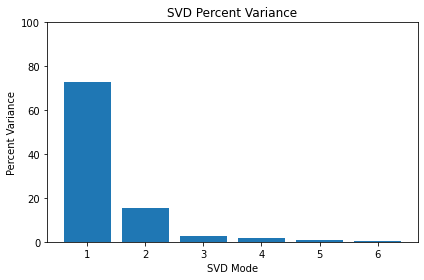

In [274]:
# finds the total variance by summing and squaring the X matrix
total_var = np.sum(X**2)

# finds the variance of each singular value from s
var_exp = s ** 2 / total_var

# converts the variance of each singular value into a percentage
var_percent = var_exp / np.sum(var_exp) * 100

# prints the percent varaince by using a bar graph.
# the y limit is set to 100 to represent 100%
plt.bar(np.arange(6) + 1,var_percent[:6])
plt.ylim(0,100)
plt.title('SVD Percent Variance')
plt.xlabel('SVD Mode')
plt.ylabel('Percent Variance')
plt.tight_layout()
plt.show()